In [1]:
import numpy as pd
import time
from IPython.core.debugger import set_trace
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(style="seaborn")

In [3]:
import pandas as pd
dataset = pd.read_csv("NFLX.csv")
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
dataset.shape

(1009, 7)

In [8]:
dataset.drop('Adj Close',axis = 1,inplace=True)

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [10]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


In [12]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


<AxesSubplot:>

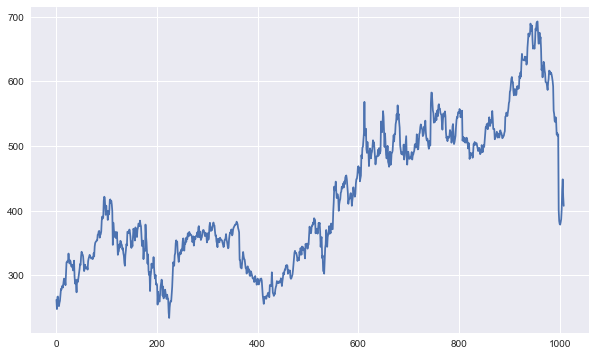

In [16]:
dataset['Open'].plot(figsize=(10,6))

In [17]:
x = dataset[['Open','High','Low','Volume']]
y = dataset[['Close']]

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix

reg = LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
print(reg.coef_)

[[-5.98637670e-01  7.42752459e-01  8.57948723e-01  9.68159261e-08]]


In [30]:
print(reg.intercept_)

[-0.70775956]


In [31]:
prediction = reg.predict(x_test)

In [33]:
print(x_test)

            Open        High         Low    Volume
801   557.000000  559.750000  550.299988   2720300
311   378.000000  383.500000  374.510010   5398200
85    368.540009  368.700012  357.799988   8278000
435   278.049988  285.750000  277.350006   6248400
204   260.549988  266.250000  253.800003  12498600
...          ...         ...         ...       ...
583   418.829987  426.720001  415.980011   3743700
200   283.790009  285.089996  269.149994  12993800
767   525.000000  548.539978  518.280029   4136500
1000  379.140015  387.709991  365.130005  15145800
385   298.859985  303.549988  296.269989   6905800

[253 rows x 4 columns]


In [34]:
prediction.shape

(253, 1)

In [40]:
df = pd.DataFrame(y_test.T, index=prediction[:, 0])


In [45]:
dfr = pd.DataFrame({'Actual_price': y_test.values.ravel(),
                    'Predicted': prediction.ravel()})


In [46]:
print(dfr)

     Actual_price   Predicted
0      553.729980  553.999288
1      379.059998  379.685786
2      361.399994  360.298634
3      281.859985  283.639587
4      261.429993  260.032497
..            ...         ...
248    425.920013  422.764132
249    270.600006  273.331047
250    546.150024  537.495050
251    366.420013  375.026471
252    302.799988  300.698946

[253 rows x 2 columns]


In [47]:
dfr.head(15)

,Actual_price,Predicted
0,553.729980,553.999288
1,379.059998,379.685786
2,361.399994,360.298634
3,281.859985,283.639587
4,261.429993,260.032497
5,434.480011,434.730957
6,265.720001,260.518692
7,518.020020,518.570772
8,315.929993,315.400869
9,348.869995,345.455041


In [48]:
reg.score(x_test,y_test)

0.9982601041694787

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [53]:
from sklearn import metrics


In [49]:
import math

In [55]:
print('Absolute Mean Error : ',metrics.mean_absolute_error(y_test,prediction) )

Absolute Mean Error :  3.124088127327877


In [56]:
print('Absolute Squared Error : ',metrics.mean_squared_error(y_test,prediction) )

Absolute Squared Error :  19.163612341201222


In [57]:
print('Root Mean Squared Error : ',math.sqrt(metrics.mean_squared_error(y_test,prediction)) )

Root Mean Squared Error :  4.377626336406663


In [58]:
graph = dfr.head(20)

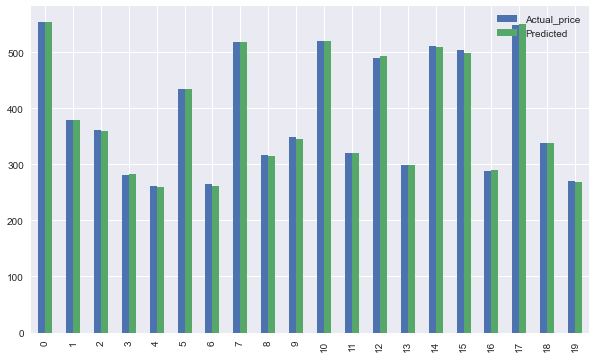

In [76]:
graph.plot(kind= 'bar');
plt.rcParams['figure.figsize']= (10,6)

In [67]:
x = dfr.tail(20)

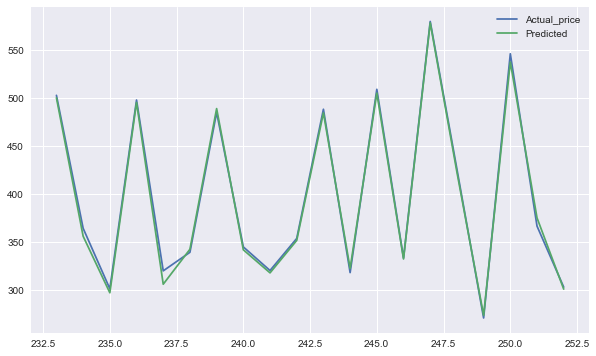

In [69]:
x.plot(kind= 'line');
plt.rcParams['figure.figsize']= (10,6)

In [77]:
import seaborn as sns 

<AxesSubplot:>

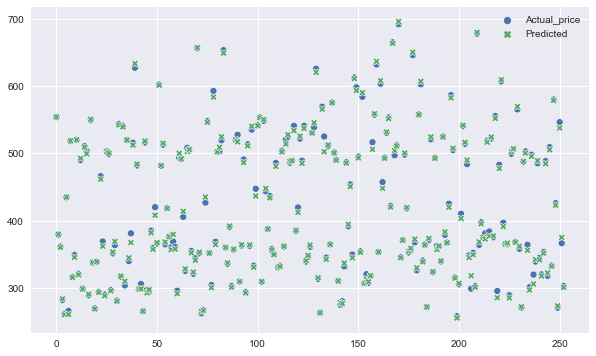

In [81]:
sns.scatterplot(data=dfr)

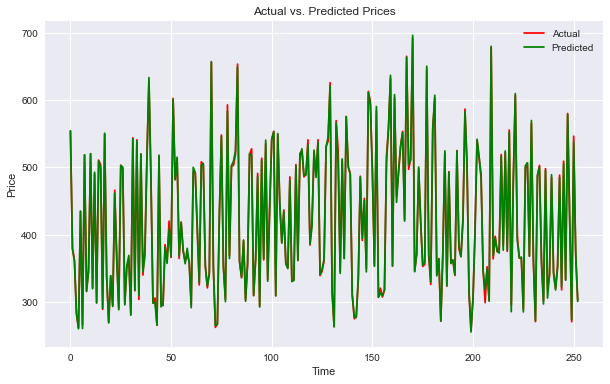

In [91]:




# Plot actual vs. predicted values using seaborn
sns.lineplot(data=dfr, x=dfr.index, y='Actual_price', color='red', label='Actual')
sns.lineplot(data=dfr, x=dfr.index, y='Predicted', color='green', label='Predicted')

# Set plot title and axes labels
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')

# Show legend
plt.legend();
